# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [ ]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [ ]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes



#### Based on the following example codes given above, DFS compute the shortest path by comparing their lengths to each other. It traverses to all possible paths and compare which is the shortest. It also uses stack and traverses verticaly, from the root node to its succeeding nodes until it is necessary to backtrack and check the other remaining nodes that are not yet visited.

10. Create a method to define BFS technique

In [ ]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    
    

#### The BFS method traverses horizontally or level by level which ensures that when you encounter the end node, it is already the shortest path. It's because BFS explores nodes based on their distance from the start node until we find the end node that is both given.

### TRYING OUT THE GIVEN CODE ABOVE

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('LRT-Cubao', 'Gateway', 'Farmers Market', 'Smart Araneta Coliseum', 'New Frontier Theater', 'MRT-Cubao', 'SM Cubao', 'Ali Mall', 'Cubao Expo'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('LRT-Cubao'), g.getNode('Gateway')))
    g.addEdge(Edge(g.getNode('Gateway'), g.getNode('LRT-Cubao')))
    g.addEdge(Edge(g.getNode('Gateway'), g.getNode('Farmers Market')))
    g.addEdge(Edge(g.getNode('Gateway'), g.getNode('Smart Araneta Coliseum')))
    g.addEdge(Edge(g.getNode('Gateway'), g.getNode('New Frontier Theater')))
    g.addEdge(Edge(g.getNode('Farmers Market'), g.getNode('Gateway')))
    g.addEdge(Edge(g.getNode('Farmers Market'), g.getNode('MRT-Cubao')))
    g.addEdge(Edge(g.getNode('MRT-Cubao'), g.getNode('Farmers Market')))
    g.addEdge(Edge(g.getNode('Smart Araneta Coliseum'), g.getNode('Farmers Market')))
    g.addEdge(Edge(g.getNode('Smart Araneta Coliseum'), g.getNode('SM Cubao')))
    g.addEdge(Edge(g.getNode('SM Cubao'), g.getNode('Smart Araneta Coliseum')))
    g.addEdge(Edge(g.getNode('SM Cubao'), g.getNode('Ali Mall')))
    g.addEdge(Edge(g.getNode('Ali Mall'), g.getNode('SM Cubao')))
    g.addEdge(Edge(g.getNode('Ali Mall'), g.getNode('Cubao Expo')))
    g.addEdge(Edge(g.getNode('Cubao Expo'), g.getNode('Ali Mall')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + ' -> '
    return result

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

In [ ]:
testSP('LRT-Cubao', 'MRT-Cubao')

Current DFS path: LRT-Cubao
Current DFS path: LRT-Cubao->Gateway
Already visited LRT-Cubao
Current DFS path: LRT-Cubao->Gateway->Farmers Market
Already visited Gateway
Current DFS path: LRT-Cubao->Gateway->Farmers Market->MRT-Cubao
Current DFS path: LRT-Cubao->Gateway->Smart Araneta Coliseum
Current DFS path: LRT-Cubao->Gateway->Smart Araneta Coliseum->Farmers Market
Already visited Gateway
Current DFS path: LRT-Cubao->Gateway->Smart Araneta Coliseum->SM Cubao
Already visited Smart Araneta Coliseum
Current DFS path: LRT-Cubao->Gateway->New Frontier Theater
Shortest path from LRT-Cubao to MRT-Cubao is LRT-Cubao->Gateway->Farmers Market->MRT-Cubao


# Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

In [ ]:
# graph
graph = {
    'LRT-Cubao': {'Gateway'},
    'Gateway': {'LRT-Cubao', 'Farmers Market', 'Smart Araneta Coliseum', 'New Frontier Theater'},
    'Farmers Market': {'MRT-Cubao', 'Gateway'},
    'MRT-Cubao': {'Farmers Market'},
    'Smart Araneta Coliseum': {'Farmers Market', 'SM Cubao'},
    'SM Cubao': {'Smart Araneta Coliseum', 'Ali Mall'},
    'Ali Mall': {'SM Cubao', 'Cubao Expo'},
    'Cubao Expo': {'Ali Mall'},
}

# another graph for testing
g2 = {
  'A' : ['B','C'],
  'B' : ['D', 'E', 'F'],
  'C' : ['G'],
  'D' : [],
  'E' : [],
  'F' : ['H'],
  'G' : ['I'],
  'H' : [],
  'I' : []
}

In [ ]:
# type your code here using DFS
def dfs(graph, node):
  visited = []
  stack = []

  visited.append(node)
  stack.append(node)

  while stack:
    s = stack.pop() # remove last item
    print(s, end = ' > ')

    if s not in graph:
      continue

    adjacent = list(graph[s])
    for n in reversed(adjacent):
      if n not in visited:
        visited.append(n)
        stack.append(n)

In [ ]:
start_node = 'LRT-Cubao'

# DFS traversal
print("DFS starting from", start_node, ":")
dfs(graph, start_node)

DFS starting from LRT-Cubao :
LRT-Cubao > Gateway > Farmers Market > MRT-Cubao > Smart Araneta Coliseum > SM Cubao > Ali Mall > Cubao Expo > New Frontier Theater > 

In [ ]:
# using DFS to find the shortest path
def dfs_shortest_path(graph, start, end, path=None):
    if path is None:
        path = []
    path = path + [start]
    if start == end:
        return path
    if start not in graph:
        return None
    shortest = None
    for node in graph[start]:
        if node not in path:
            newpath = dfs_shortest_path(graph, node, end, path) # recursive approach
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

In [ ]:
start_node = 'Smart Araneta Coliseum'
end_node = 'LRT-Cubao'

print("Shorted path using DFS:")
dfs_shortest_path(graph, start_node, end_node)

Shorted path using DFS:


['Smart Araneta Coliseum', 'Farmers Market', 'Gateway', 'LRT-Cubao']

In [ ]:
# type your code here using BFS
def bfs(graph, node):
  visited = []
  queue = []

  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) # remove first item
    print(s, end = ' > ')

    if s not in graph:
      continue

    for n in graph[s]:
      if n not in visited:
        visited.append(n)
        queue.append(n)

In [ ]:
start_node = 'LRT-Cubao'

# BFS traversal
print("BFS starting from", start_node, ":")
bfs(graph, start_node)

BFS starting from LRT-Cubao :
LRT-Cubao > Gateway > Farmers Market > Smart Araneta Coliseum > New Frontier Theater > MRT-Cubao > SM Cubao > Ali Mall > Cubao Expo > 

In [ ]:
# using BFS to find the shortest path
def bfs_shortest_path(graph, start, end):
    queue = [(start, [start])]
    visited = []

    while queue:
        node, path = queue.pop(0)

        if node == end:
            return path

        if node not in visited:
            visited.append(node)
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

    return None

In [ ]:
start_node = 'LRT-Cubao'
end_node = 'SM Cubao'

print("Shorted path using BFS:")
bfs_shortest_path(graph, start_node, end_node)

Shorted path using BFS:


['LRT-Cubao', 'Gateway', 'Smart Araneta Coliseum', 'SM Cubao']

**GRAPH**


*   The location I used is the malls and establishments found in Cubao where people are usually around. The image below shows the flow of the graph and the directions in which it goes from one vertex to another.



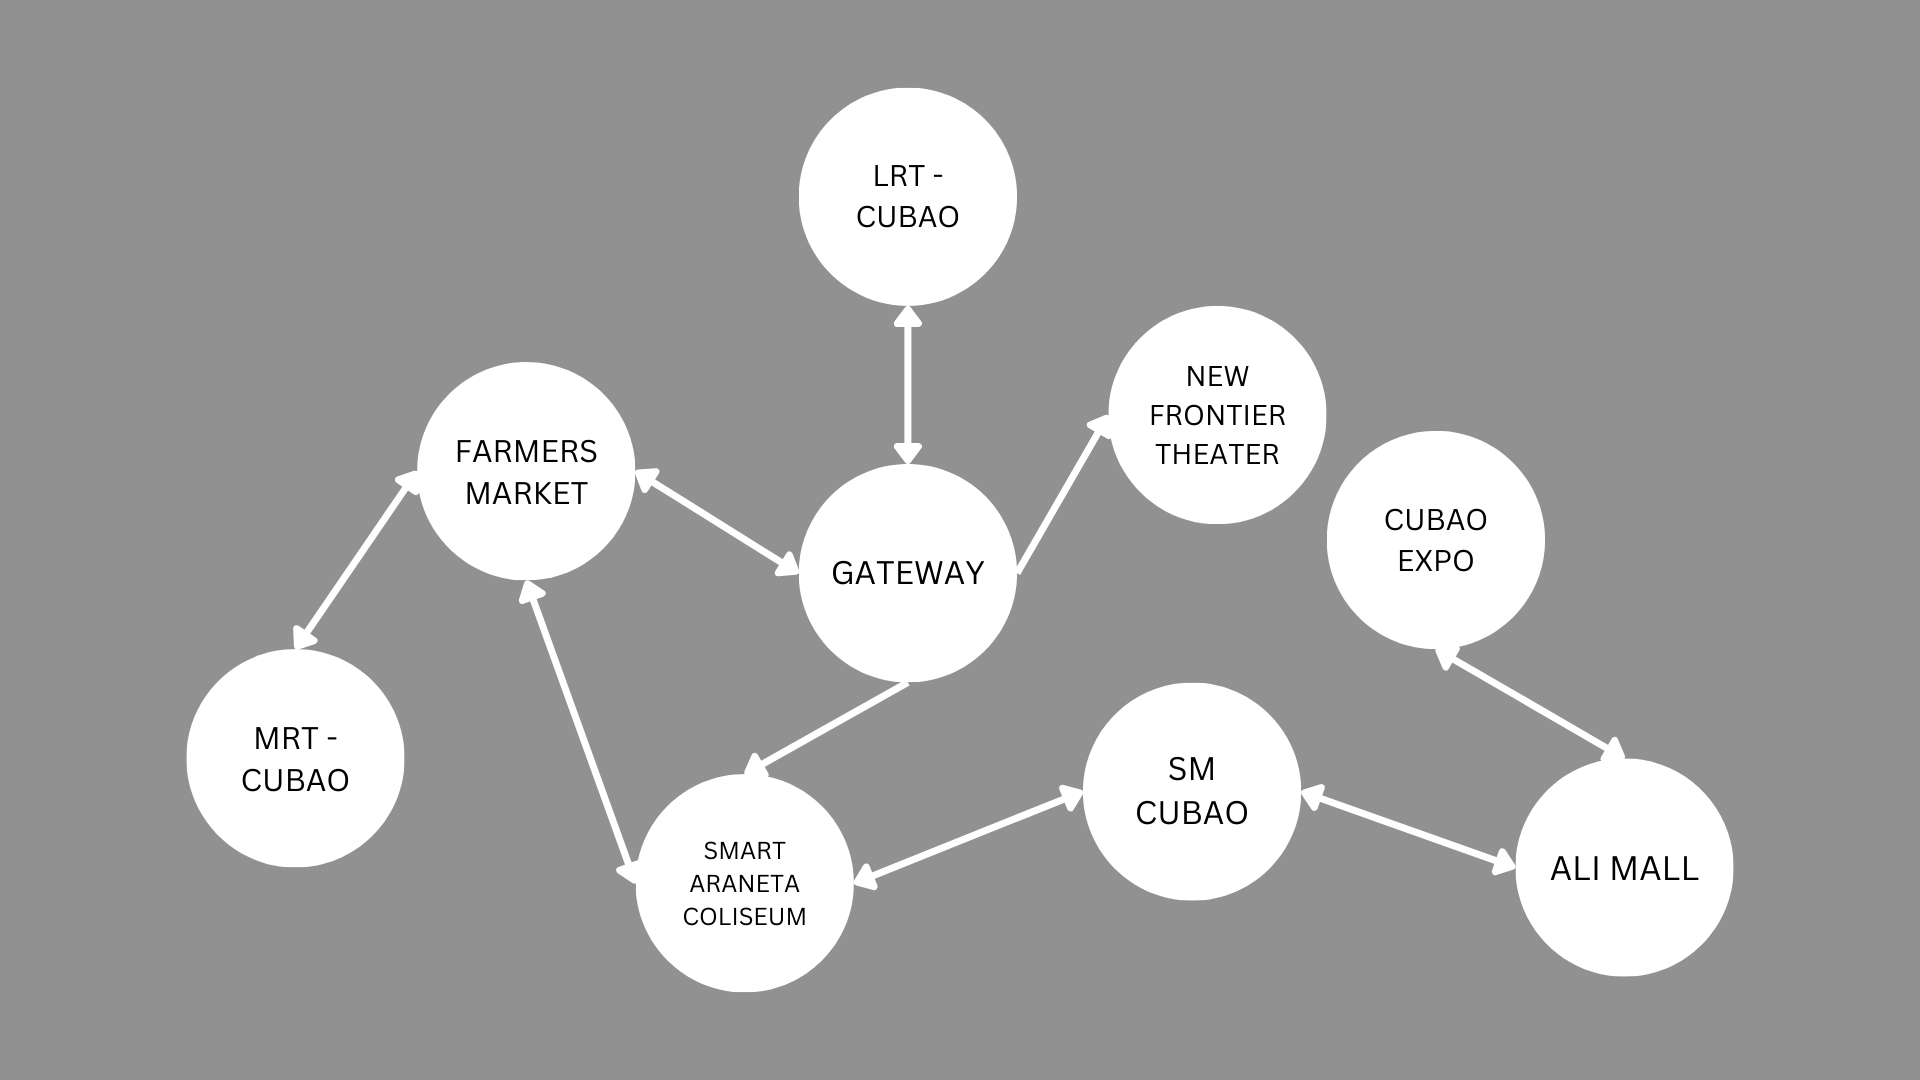

##### DFS and BFS are both useful to know. DFS explores notes vertically which reaches deeper nodes much more faster which makes it more efficient than BFS that traverses the nodes level by level and requires more memory. They have the same intention but the other one could be better than the other.

#### Conclusion

This activity helped me understand DFS and BFS. The example code in the procedures gave us a great example on how it is utilized and how it works in a coding perspective. DFS is apparently faster than BFS. However, I still quite fond of BFS for I understand it a little better than DFS and I think that I'm more confident in implementing it than DFS. Still, both have their own thing and I guess it depende on your intentions which one's to choose.

I approach the supplementary activity a little different from the example codes used in the procedures to cut some length to it. I used a dictionary to represent my graph. Some errors I encounter while doing this activity is the initialization of list and because the graph I used is directed, I also encountered some problems that a conditional statement solved. I still learned a lot from this HOA and it made me understand how graph works more and actually doing something with it.